## Path to Source

In [1]:
# load local version before pip installed version, for debugging
import sys
import pathlib

sys.path.append(pathlib.Path(__file__).parent.parent.joinpath("src"))

## Imports

In [2]:
import yt

from gallifrey.data.load import load_snapshot
from gallifrey.halo import MainHalo
from gallifrey.utilities.time import Timer

## Load Data

In [3]:
snapshot = 127
resolution = 4096
sim_id = "09_18"

In [4]:
ds = load_snapshot(snapshot, resolution)
mw = MainHalo("MW", resolution, sim_id)


      DETECTED LOCAL MACHINE: Test snapshot loaded.

yt : [INFO     ] 2023-02-21 16:13:55,033 Calculating time from 1.000e+00 to be 4.318e+17 seconds
yt : [INFO     ] 2023-02-21 16:13:55,094 Parameters: current_time              = 4.318436660023809e+17 s
yt : [INFO     ] 2023-02-21 16:13:55,095 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-02-21 16:13:55,095 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-02-21 16:13:55,096 Parameters: domain_right_edge         = [100. 100. 100.]
yt : [INFO     ] 2023-02-21 16:13:55,096 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-02-21 16:13:55,097 Parameters: current_redshift          = 4.440892098500626e-16
yt : [INFO     ] 2023-02-21 16:13:55,097 Parameters: omega_lambda              = 0.682
yt : [INFO     ] 2023-02-21 16:13:55,097 Parameters: omega_matter              = 0.318
yt : [INFO     ] 2023-02-21 16:13:55,097 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 202

## Plots

In [ ]:
# gas density-weighted gas metallicity
p = yt.ProjectionPlot(
    ds,
    #normal='z',
    normal=mw.sphere(ds).quantities.angular_momentum_vector().value,
    fields=("PartType0", "GFM_Metallicity"),
    weight_field=("PartType0", "density"),
    data_source=mw.sphere(ds),
    center=mw.centre(ds),
    width=(55, "kpc"),
)

p.set_unit(("PartType0", "GFM_Metallicity"), "Zsun")
p.set_log(("PartType0", "GFM_Metallicity"), False)
p.show()

yt : [INFO     ] 2023-02-21 16:15:23,755 xlim = -0.018637 0.018637
yt : [INFO     ] 2023-02-21 16:15:23,756 ylim = -0.018637 0.018637
yt : [INFO     ] 2023-02-21 16:15:23,756 zlim = -50.000000 50.000000
yt : [INFO     ] 2023-02-21 16:15:23,757 Making a fixed resolution buffer of (('PartType0', 'GFM_Metallicity')) 800 by 800


yt : [INFO     ] 2023-02-21 16:14:35,092 xlim = 69017.183488 69072.183488
yt : [INFO     ] 2023-02-21 16:14:35,093 ylim = 72371.296075 72426.296075
yt : [INFO     ] 2023-02-21 16:14:35,093 xlim = 69017.183488 69072.183488
yt : [INFO     ] 2023-02-21 16:14:35,094 ylim = 72371.296075 72426.296075
yt : [INFO     ] 2023-02-21 16:14:35,095 Splatting (('PartType4', 'GFM_Metallicity')) onto a 800 by 800 mesh using method 'ngp'



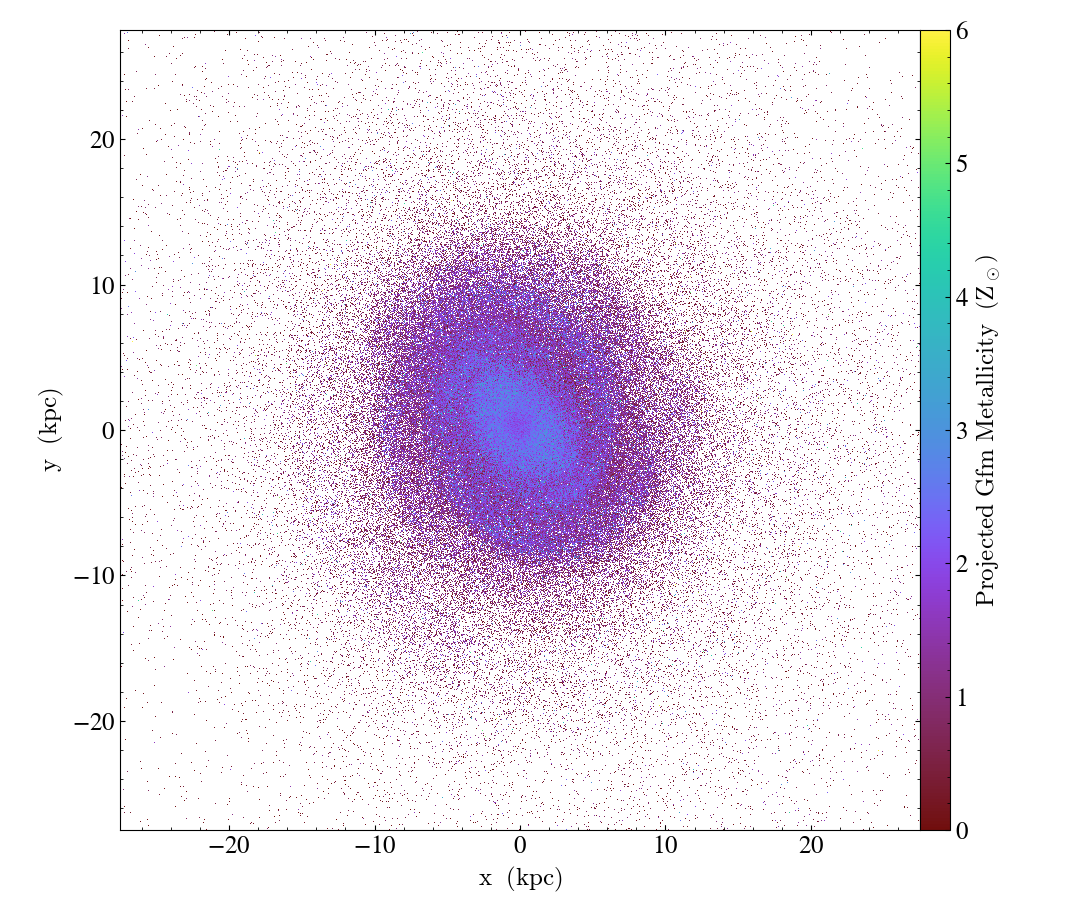

In [6]:
# stellar metallicities
p = yt.ParticleProjectionPlot(
    ds,
    axis='z',
    fields=("PartType4", "GFM_Metallicity"),
    weight_field=("PartType4", "particle_ones"),
    data_source=mw.sphere(ds),
    center=mw.centre(ds),
    width=(55, "kpc"),
)
p.set_unit(("PartType4", "GFM_Metallicity"), "Zsun")
p.set_log(("PartType4", "GFM_Metallicity"), False)
p.set_zlim(("PartType4", "GFM_Metallicity"), zmin=(0, "Zsun"), zmax=(6, "Zsun"))
p.show()